In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from format_io import h5_to_df

from akita_utils.seq_gens import split_concat_to_integers, split_concat_to_strings

2022-12-16 05:36:36.512332: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home1/smaruj/software/GSL/lib:/home1/smaruj/software/HTSLIB/lib
2022-12-16 05:36:36.512381: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def average_over_targets(dataframe, stat, mouse=True, model=1):
    
    num_targets = 6
    if not mouse:
        num_targets = 5
    
    collist = [stat + f"_h{int(mouse)}_m{model}_t{i}" for i in range(num_targets)]
    
    dataframe[f"{stat}_average"] = dataframe[collist].mean(axis=1)
    
    return dataframe

In [3]:
path = "./10VS10random/scd.h5"
scd_stats=["SCD"]

In [4]:
df = h5_to_df(path, scd_stats, drop_duplicates_key=None)

In [5]:
df = average_over_targets(df, "SCD")

In [6]:
df

,SCD_h1_m1_t0,SCD_h1_m1_t1,SCD_h1_m1_t2,SCD_h1_m1_t3,SCD_h1_m1_t4,SCD_h1_m1_t5,background_index,chrom,end,flank_bp,genomic_SCD,orientation,spacer_bp,start,strand,SCD_average
0,37.12500,26.515625,45.43750,47.00000,42.56250,41.65625,1,"chr17,chr2","86906334,118638293",0,"46.8125,48.6875",>>,90,"86906315,118638274","-,+",40.03125
1,39.84375,31.734375,45.03125,45.84375,43.46875,42.00000,1,"chr17,chr1","86906334,21411405",0,"46.8125,48.4375",>>,90,"86906315,21411386","-,+",41.34375
2,39.00000,31.093750,45.18750,45.90625,43.46875,41.96875,1,"chr17,chr12","86906334,92303388",0,"46.8125,51.625",>>,90,"86906315,92303369","-,+",41.12500
3,40.56250,33.625000,45.18750,45.59375,44.06250,42.28125,1,"chr17,chr15","86906334,44836402",0,"46.8125,47.125",>>,90,"86906315,44836383","-,+",41.87500
4,39.28125,30.640625,45.06250,46.03125,43.21875,41.90625,1,"chr17,chr1","86906334,54381475",0,"46.8125,43.5625",>>,90,"86906315,54381456","-,-",41.03125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9295,80.87500,96.500000,95.37500,89.81250,93.62500,75.75000,3,"chr19,chr8","37559803,58566283",30,"11.21875,52.875",>>,60,"37559784,58566264","+,+",88.68750
9296,67.25000,78.687500,75.62500,72.25000,76.56250,63.46875,3,"chr19,chr18","37559803,19939562",30,"11.21875,40.25",>>,60,"37559784,19939543","+,-",72.31250
9297,76.31250,90.687500,88.12500,83.12500,87.43750,71.00000,3,"chr19,chr3","37559803,45375963",30,"11.21875,40.6875",>>,60,"37559784,45375944","+,+",82.81250
9298,48.84375,47.687500,59.00000,61.18750,56.90625,50.34375,3,"chr19,chr3","37559803,31146135",30,"11.21875,44.1875",>>,60,"37559784,31146116","+,+",54.00000


In [7]:
all_starts = list(df.start.unique())

In [9]:
all_cores_starts = {"motif 0" : 86906315, 
             "motif 1" : 56759284, 
             "motif 2" : 144248117,
             "motif 3" : 127971074,
            "motif 4" : 50943805,
            "motif 5" : 58299639,
            "motif 6" : 119223847,
            "motif 7" : 115515211,
            "motif 8" : 70621534,
            "motif 9" : 37559784}

In [10]:
df_grouped = df.groupby(["start", "flank_bp"]).agg({"SCD_average": "mean"}).reset_index()

In [11]:
x = [x for x in range(31)]

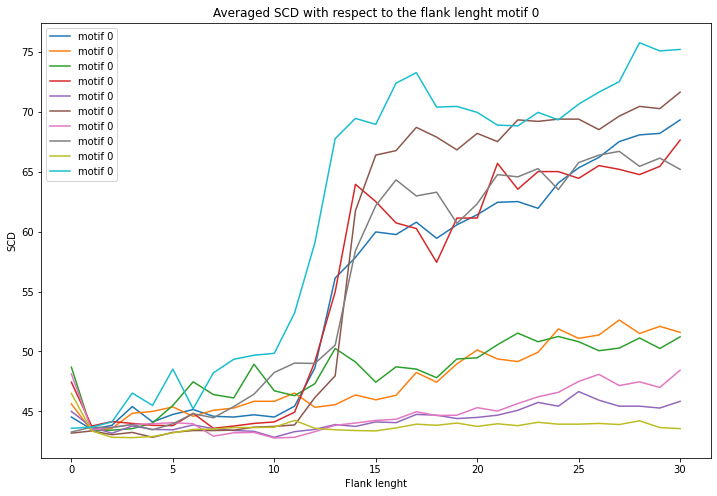

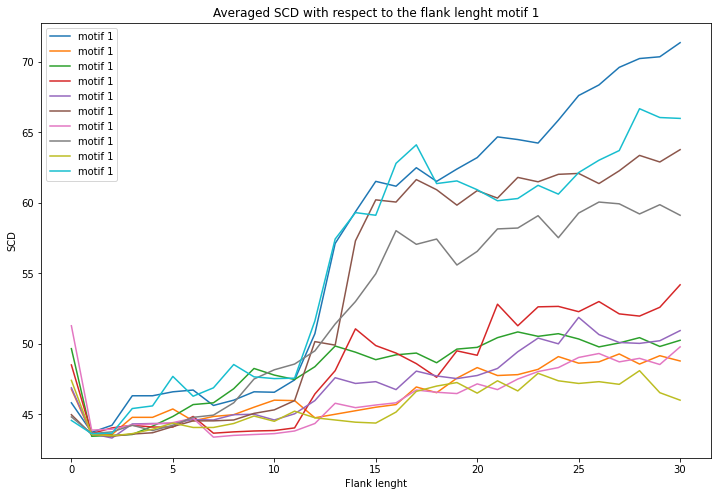

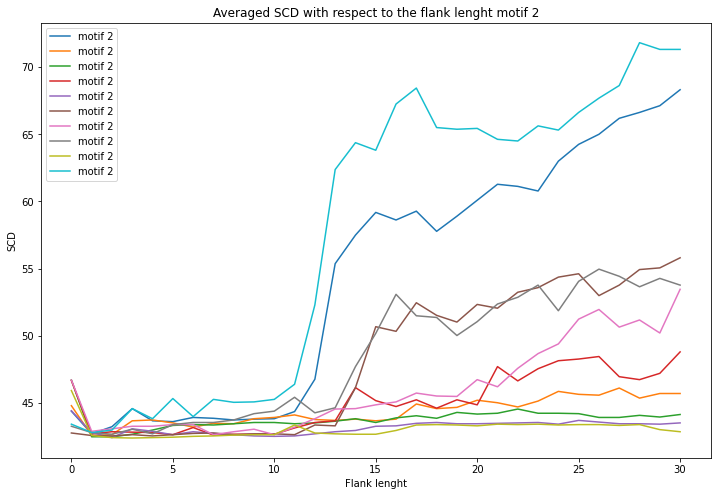

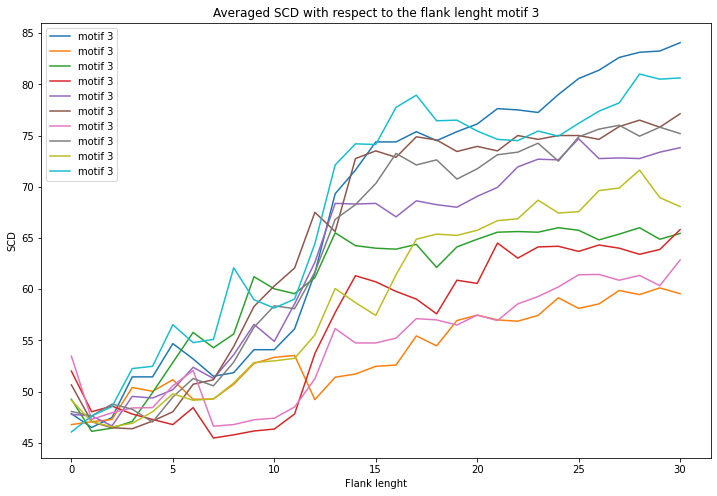

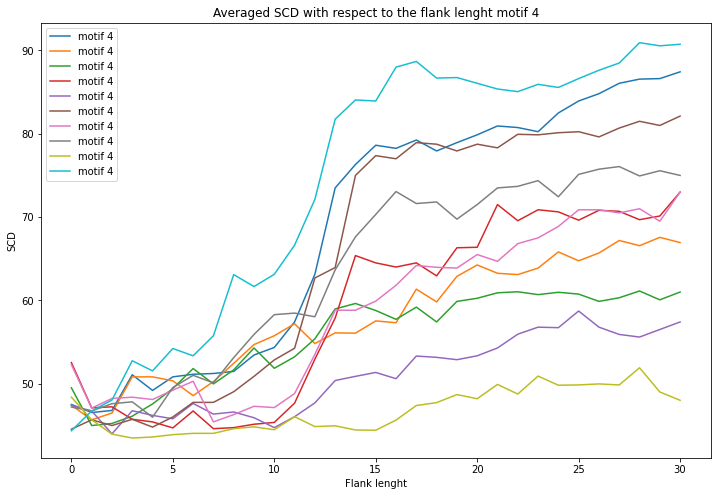

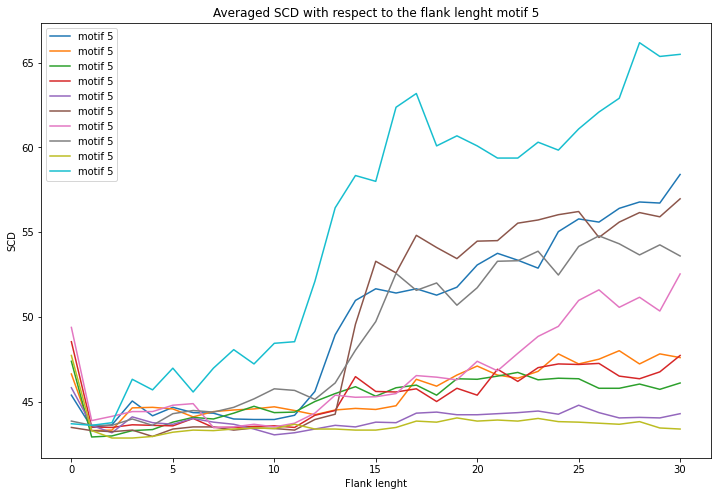

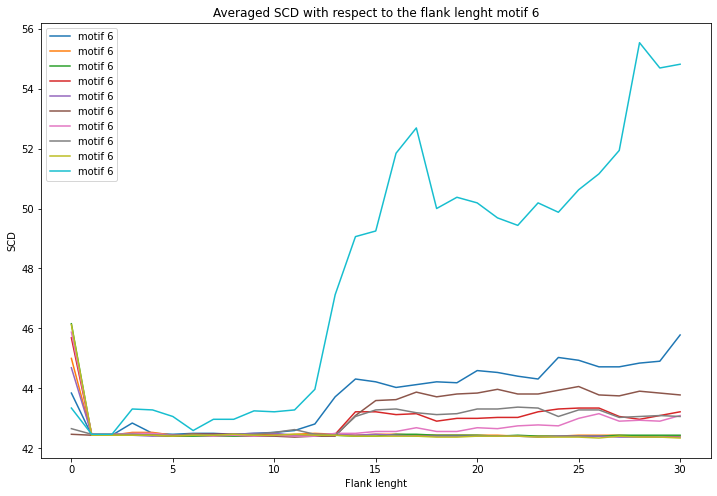

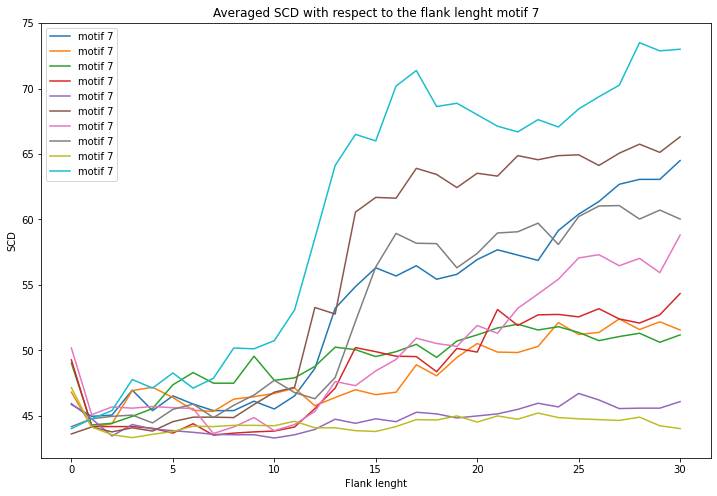

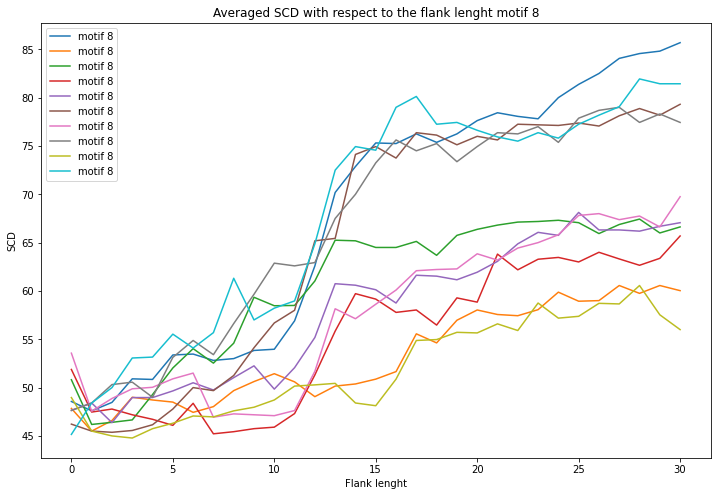

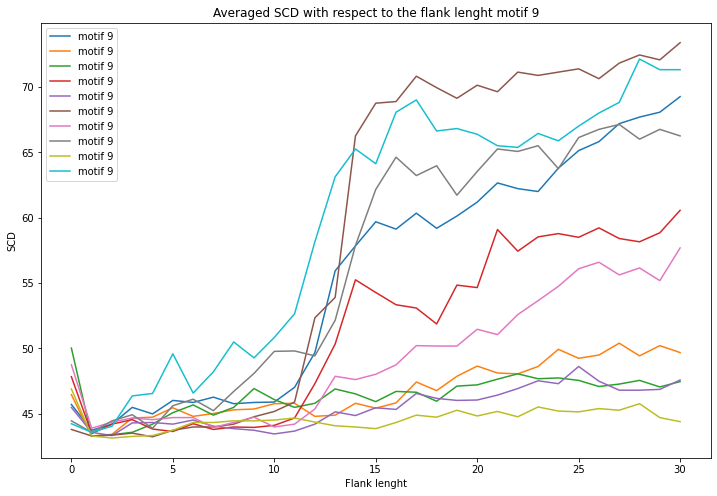

In [13]:
for key in all_cores_starts:
    
    plt.figure(figsize=(12,8))
    
    for start in all_starts:

        core_start, flank_start = split_concat_to_integers(start)

        if core_start == all_cores_starts[key]:
            plt.plot(x, df_grouped[df_grouped["start"] == start]["SCD_average"], 
                     label=key)
            
    plt.title("Averaged SCD with respect to the flank lenght " + key)
    plt.xlabel("Flank lenght")
    plt.ylabel("SCD")
    plt.legend(loc="upper left")

In [ ]:
plt.figure(figsize=(12,8))

for start in all_starts:
    
    core_start, flank_start = split_concat_to_integers(start)
    
    if core_start == 48886252:
        if core_start == flank_start:
            plt.plot(x, df_grouped[df_grouped["start"] == start]["SCD_average"], 
                 label="gene 2, its own flank")
        else:
            plt.plot(x, df_grouped[df_grouped["start"] == start]["SCD_average"], 
                 label="gene 2, different flanks")
            
plt.title("Averaged SCD with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("SCD")
plt.legend(loc="upper left")